# Bezier Curve Formulation and Visualization

A Bezier Curve is a parametric curve where a non-linear path is created from point A to point B where the position of the particle is determined by the t parameter where 0<=t<=1

A Bezier Curve is created with a set number of control points that control the curvature of the space curve along its path from start to finish

Below is the Bezier Equation <br>
$P(t) = \sum_{i=0}^{m} B_{i}^{m}(t)P_{i}$

$B_{i}^{m}(t)$ is the Bernstein Polynomial <br>
$P_{i} $ is the control point <br> <br>

say for example, we have the following control points: <br>
$P_0 = (0,0)$  $P_1 = (2,2)$ $P_2=(6,4)$ $P_3=(8,8)$ <br> <br>

This means that we can perceive the Bezier Curve Equation as the following: <br>
$P(t) = \sum_{i=0}^{3} B_{i}^{3}(t)P_{i} = B_0^3(t)P_0 + B_1^3(t)P_1+B_2^3(t)P_2+B_3^3(t)P_3$ <br> <br>

This results in <br>
$P(t) = <6t+6t^2-4t^3,6t+2t^3>$ <br> <br>

or it can be looked at as a parametric curve like so <br>
$ x(t) = 6t+6t^2-4t^3 $ <br>
$ y(t) = 6t+2t^3 $ 

In [80]:
import matplotlib.pyplot as plt 
import numpy as np
import math
%matplotlib inline

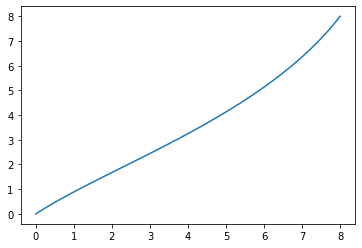

In [81]:
'''
    plotting the parametric curve:
        x(t) = 6t+6t^2-4t^3
        y(t) = 6t+2t^3
'''
t = np.linspace(0,1,100)
def x(t):
    return 6*t + 6*t*t - 4*t*t*t
def y(t):
    return 6*t + 2*t*t*t

plt.plot( x(t), y(t) )

## Automating Bezier Curve Calculation

In [82]:
def bernstein(i: int, m: int, t: float):
    '''
        i, m, and t are exactly the same representation as the above math states.
        i -> the index of the point P_i
        m -> the total # of points - 1
        t -> current "position" of the particle along the space curve
        0<=t<=1
        
        returns the berstein polynomial scalar for the point
    '''
    return math.comb(m,i) * (t**i) * ((1-t)**(m-i))
def bezier_curve(control_pts: [(float,float)], t: float):
    '''
        calculates position of the bezier curve when inputted the 
        control pts and input t
    '''
    m = len(control_pts) - 1
    pos_x, pos_y = 0,0
    for i in range(len(control_pts)):
        x,y = control_pts[i]
        
        const = bernstein(i,m,t)
        pos_x += const * x
        pos_y += const * y
    return (pos_x, pos_y)

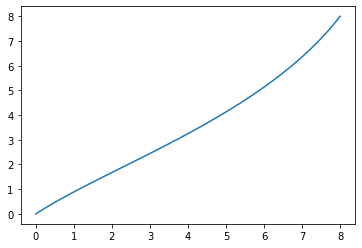

In [88]:
control_pts = [(0,0), (2,2), (6,4), (8,8)]

t = np.linspace(0,1,100)
x = np.zeros(shape=(100,))
y = np.zeros(shape=(100,))
for idx in range(t.shape[0]):
    x[idx], y[idx] = bezier_curve(control_pts, t[idx])

plt.plot(x,y)

## Automating Bezier Curves

In [92]:
class Bezier:
    def __init__(self, control_points: [(float,float)]):
        self.control_points = control_points
        self.term_len = len(control_points)-1
    def bernstein(self, index: int, t: float):
        return math.comb(self.term_len,index) * (t**index) * ((1-t)**(self.term_len-index))
    def position(self, t):
        pos_x, pos_y = 0,0
        for i in range(self.term_len+1):
            x,y = self.control_points[i]
            const = self.bernstein(index,t)
            pos_x += const * x
            pos_y += const * y
        return (pos_x,pos_y)
    def graph(self, length: int):
        t = np.linspace(0,1,length)
        x = np.zeros(shape=(length,))
        y = np.zeros(shape=(length,))
        for idx in range(t.shape[0]):
            x[idx], y[idx] = bezier_curve(control_pts, t[idx])
        
        x_pts = [pt[0] for pt in self.control_points]
        y_pts = [pt[1] for pt in self.control_points]
        
        plt.plot(x,y)
        plt.plot(x_pts, y_pts, '--')
        plt.show()

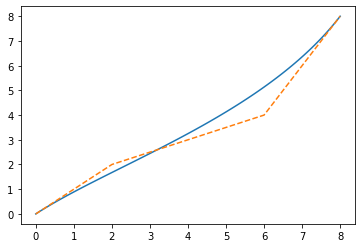

In [93]:
control_pts = [(0,0), (2,2), (6,4), (8,8)]
bezier1 = Bezier(control_pts)

bezier1.graph(100)

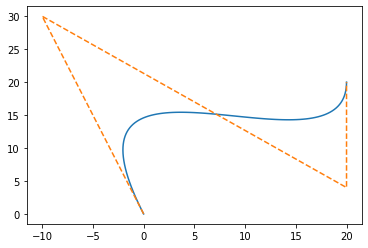

In [94]:
control_pts = [(0,0), (-10,30), (20,4), (20,20)]
bezier1 = Bezier(control_pts)

bezier1.graph(100)

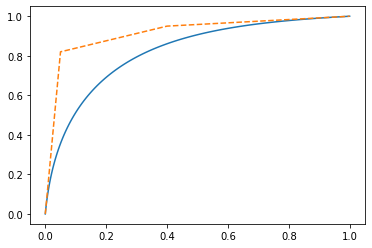

In [97]:
control_pts = [(0,0), (0.05,0.82), (0.4,0.95), (1,1)]
bezier1 = Bezier(control_pts)

bezier1.graph(100)